In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
'B': ['B0', 'B1', 'B2'],
'C': ['C0', 'C1', 'C2']}, index=[0, 1, 2])
df2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'],
'B': ['B3', 'B4', 'B5'],
'C': ['C3', 'C4', 'C5']}, index=[3, 4, 5])
df3 = pd.DataFrame({'A': ['A6', 'A7', 'A8'],
'B': ['B6', 'B7', 'B8'],
'C': ['C6', 'C7', 'C8']}, index=[6, 7, 8])
frames = [df1, df2, df3]
result = pd.concat(frames)
result1 = pd.concat(frames, keys=['x', 'y', 'z'])

In [3]:
result

In [4]:
result1

In [5]:
result1.loc['z']

,A,B,C
6,A6,B6,C6
7,A7,B7,C7
8,A8,B8,C8


In [6]:
df4 = pd.DataFrame({'B': ['B2', 'B6', 'B7'],
'C': ['C2', 'C6', 'C7'],
'E': ['E2', 'E6', 'E7']}, index=[2, 6, 7])
result = pd.concat([df1, df4], axis=1, sort=False)
result

,A,B,C,B,C,E
0,A0,B0,C0,NaN,NaN,NaN
1,A1,B1,C1,NaN,NaN,NaN
2,A2,B2,C2,B2,C2,E2
6,NaN,NaN,NaN,B6,C6,E6
7,NaN,NaN,NaN,B7,C7,E7


In [7]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,B,C,E
2,A2,B2,C2,B2,C2,E2


In [8]:
result = pd.concat([df1, df4], axis=1).reindex(df1.index)
result

,A,B,C,B,C,E
0,A0,B0,C0,NaN,NaN,NaN
1,A1,B1,C1,NaN,NaN,NaN
2,A2,B2,C2,B2,C2,E2


In [9]:
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,E
0,A0,B0,C0,NaN
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B2,C2,E2
4,NaN,B6,C6,E6
5,NaN,B7,C7,E7


In [10]:
result = df1.append(df2)
result

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5


In [11]:
result = df1.append(df4, sort=False)
result

,A,B,C,E
0,A0,B0,C0,NaN
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
2,NaN,B2,C2,E2
6,NaN,B6,C6,E6
7,NaN,B7,C7,E7


In [12]:
s1 = pd.Series(['Q0', 'Q1', 'Q2', 'Q3'], index=['A', 'B', 'C', 'D'])
result = df1.append(s1, ignore_index=True)
result

,A,B,C,D
0,A0,B0,C0,NaN
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,Q0,Q1,Q2,Q3


In [13]:
dicts = [{'A': 1, 'B': 2, 'X': 3}, {'A': 4, 'B': 5, 'Y': 6}]
result = df1.append(dicts, ignore_index=True, sort=False)
result

,A,B,C,X,Y
0,A0,B0,C0,NaN,NaN
1,A1,B1,C1,NaN,NaN
2,A2,B2,C2,NaN,NaN
3,1,2,NaN,3.0,NaN
4,4,5,NaN,NaN,6.0


In [14]:
s2 = pd.Series(['Z0', 'Z1', 'Z2', 'Z3'], name='Z')
result = pd.concat([df1, s2], axis=1)
result

,A,B,C,Z
0,A0,B0,C0,Z0
1,A1,B1,C1,Z1
2,A2,B2,C2,Z2
3,NaN,NaN,NaN,Z3


In [15]:
s3 = pd.Series(['*0', '*1', '*2'])
result = pd.concat([df1, s3, s3, s3], axis=1)
result

,A,B,C,0,1,2
0,A0,B0,C0,*0,*0,*0
1,A1,B1,C1,*1,*1,*1
2,A2,B2,C2,*2,*2,*2


In [16]:
s4 = pd.Series([0, 1, 2, 3], name='J')
s5 = pd.Series([0, 1, 2, 3])
s6 = pd.Series([0, 1, 4, 5])
pd.concat([s4, s5, s6], axis=1)

,J,0,1
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [17]:
pd.concat([s4, s5, s6], axis=1, keys=['ha', 'hi', 'ho'])

,ha,hi,ho
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [18]:
result = pd.concat(frames, keys=['ha', 'hi', 'ho'])
pic = {'ha': df1, 'hi': df2, 'ho': df3}
result1 = pd.concat(pic)
result1

A   B   C
ha 0  A0  B0  C0
   1  A1  B1  C1
   2  A2  B2  C2
hi 3  A3  B3  C3
   4  A4  B4  C4
   5  A5  B5  C5
ho 6  A6  B6  C6
   7  A7  B7  C7
   8  A8  B8  C8

In [19]:
result = pd.concat(pic, keys=['ho', 'hi'])
result

A   B   C
ho 6  A6  B6  C6
   7  A7  B7  C7
   8  A8  B8  C8
hi 3  A3  B3  C3
   4  A4  B4  C4
   5  A5  B5  C5

In [20]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value': np.random.randn(4)})
df2 = pd.DataFrame({'key': ['B', 'D', 'D', 'E'], 'value': np.random.randn(4)})
pd.merge(df1, df2, on='key')

,key,value_x,value_y
0,B,-0.111707,-0.034667
1,D,-0.549673,0.073370
2,D,-0.549673,1.084044


In [21]:
pd.merge(df1, df2, on='key', how='left')

,key,value_x,value_y
0,A,-0.673925,NaN
1,B,-0.111707,-0.034667
2,C,1.162648,NaN
3,D,-0.549673,0.073370
4,D,-0.549673,1.084044


In [22]:
pd.merge(df1, df2, on='key', how='right')

,key,value_x,value_y
0,B,-0.111707,-0.034667
1,D,-0.549673,0.073370
2,D,-0.549673,1.084044
3,E,NaN,-0.357179


In [23]:
pd.merge(df1, df2, on='key', how='outer')

,key,value_x,value_y
0,A,-0.673925,NaN
1,B,-0.111707,-0.034667
2,C,1.162648,NaN
3,D,-0.549673,0.073370
4,D,-0.549673,1.084044
5,E,NaN,-0.357179


In [24]:
left = pd.DataFrame({'key1': ['Z0', 'Z0', 'Z1', 'Z2'],
'key2': ['Z0', 'Z1', 'Z0', 'Z1'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['Z0', 'Z1', 'Z1', 'Z2'],
'key2': ['Z0', 'Z0', 'Z0', 'Z0'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})
result = pd.merge(left, right, on=['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,Z0,Z0,A0,B0,C0,D0
1,Z1,Z0,A2,B2,C1,D1
2,Z1,Z0,A2,B2,C2,D2


In [25]:
result = pd.merge(left, right, how='left', on=['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,Z0,Z0,A0,B0,C0,D0
1,Z0,Z1,A1,B1,NaN,NaN
2,Z1,Z0,A2,B2,C1,D1
3,Z1,Z0,A2,B2,C2,D2
4,Z2,Z1,A3,B3,NaN,NaN


In [26]:
result = pd.merge(left, right, how='right', on=['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,Z0,Z0,A0,B0,C0,D0
1,Z1,Z0,A2,B2,C1,D1
2,Z1,Z0,A2,B2,C2,D2
3,Z2,Z0,NaN,NaN,C3,D3


In [27]:
result = pd.merge(left, right, how='outer', on=['key1', 'key2'])
result

,key1,key2,A,B,C,D
0,Z0,Z0,A0,B0,C0,D0
1,Z0,Z1,A1,B1,NaN,NaN
2,Z1,Z0,A2,B2,C1,D1
3,Z1,Z0,A2,B2,C2,D2
4,Z2,Z1,A3,B3,NaN,NaN
5,Z2,Z0,NaN,NaN,C3,D3


In [28]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
'B': ['B0', 'B1', 'B2']}, index=['Z0', 'Z1', 'Z2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
'D': ['D0', 'D2', 'D3']}, index=['Z0', 'Z2', 'Z3'])
result = left.join(right)
result

,A,B,C,D
Z0,A0,B0,C0,D0
Z1,A1,B1,NaN,NaN
Z2,A2,B2,C2,D2


In [29]:
result = left.join(right, how='outer')
result

,A,B,C,D
Z0,A0,B0,C0,D0
Z1,A1,B1,NaN,NaN
Z2,A2,B2,C2,D2
Z3,NaN,NaN,C3,D3


In [30]:
result = left.join(right, how='inner')
result

,A,B,C,D
Z0,A0,B0,C0,D0
Z2,A2,B2,C2,D2


In [31]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'key': ['Z0', 'Z1', 'Z0', 'Z1']})
right = pd.DataFrame({'C': ['C0', 'C1'],
'D': ['D0', 'D1']}, index=['Z0', 'Z1'])
result = left.join(right, on='key')
result

,A,B,key,C,D
0,A0,B0,Z0,C0,D0
1,A1,B1,Z1,C1,D1
2,A2,B2,Z0,C0,D0
3,A3,B3,Z1,C1,D1


In [32]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'key1': ['Z0', 'Z0', 'Z1', 'Z2'],
'key2': ['Z0', 'Z1', 'Z0', 'Z1']})
ind = pd.MultiIndex.from_tuples([('Z0', 'Z0'), ('Z1', 'Z0'), ('Z2', 'Z0'), ('Z2', 'Z1')])
right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']}, index=ind)
result = left.join(right, on=['key1', 'key2'])
result

,A,B,key1,key2,C,D
0,A0,B0,Z0,Z0,C0,D0
1,A1,B1,Z0,Z1,NaN,NaN
2,A2,B2,Z1,Z0,C1,D1
3,A3,B3,Z2,Z1,C3,D3


In [33]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2']},
index=pd.Index(['Z0', 'Z1', 'Z2'], name='key'))
ind = pd.MultiIndex.from_tuples([('Z0', 'Y0'), ('Z1', 'Y1'), ('Z2', 'Y2'), ('Z2', 'Y3')],
names=['key', 'Y'])
right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']}, index=ind)
result = left.join(right, how='inner')
result

A   B   C   D
key Y                 
Z0  Y0  A0  B0  C0  D0
Z1  Y1  A1  B1  C1  D1
Z2  Y2  A2  B2  C2  D2
    Y3  A2  B2  C3  D3

In [34]:
result = pd.merge(left.reset_index(), right.reset_index(),
on=['key'], how='inner').set_index(['key', 'Y'])

In [35]:
l_ind = pd.MultiIndex.from_product([list('abc'), list('xy'),
[1, 2]], names=['abc', 'xy', 'num'])
left = pd.DataFrame({'z1': range(12)}, index=l_ind)
r_ind = pd.MultiIndex.from_product([list('abc'), list('xy')], names=['abc', 'xy'])
right = pd.DataFrame({'z2': [100 * i for i in range(1, 7)]}, index=r_ind)
left

z1
abc xy num    
a   x  1     0
       2     1
    y  1     2
       2     3
b   x  1     4
       2     5
    y  1     6
       2     7
c   x  1     8
       2     9
    y  1    10
       2    11

In [36]:
right

z2
abc xy     
a   x   100
    y   200
b   x   300
    y   400
c   x   500
    y   600

In [37]:
left.join(right, on=['abc', 'xy'], how='inner')

z1   z2
abc xy num         
a   x  1     0  100
       2     1  100
    y  1     2  200
       2     3  200
b   x  1     4  300
       2     5  300
    y  1     6  400
       2     7  400
c   x  1     8  500
       2     9  500
    y  1    10  600
       2    11  600

In [38]:
l_ind = pd.Index(['Z0', 'Z0', 'Z1', 'Z2'], name='key1')
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'key2': ['Z0', 'Z1', 'Z0', 'Z1']}, index=l_ind)
r_ind = pd.Index(['Z0', 'Z1', 'Z2', 'Z2'], name='key1')
right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3'],
'key2': ['Z0', 'Z0', 'Z0', 'Z1']}, index=r_ind)
result = left.merge(right, on=['key1', 'key2'])
result

,A,B,key2,C,D
key1,,,,,
Z0,A0,B0,Z0,C0,D0
Z1,A2,B2,Z0,C1,D1
Z2,A3,B3,Z1,C3,D3


In [39]:
left = pd.DataFrame({'z': ['Z0', 'Z1', 'Z2'], 'v': [1, 2, 3]})
right = pd.DataFrame({'z': ['Z0', 'Z0', 'Z3'], 'v': [4, 5, 6]})
result = pd.merge(left, right, on='z')
result1 = pd.merge(left, right, on='z', suffixes=['_l', '_r'])
result

,z,v_x,v_y
0,Z0,1,4
1,Z0,1,5


In [40]:
result1

,z,v_l,v_r
0,Z0,1,4
1,Z0,1,5


In [41]:
left = left.set_index('v')
right = right.set_index('v')
result = left.join(right, lsuffix='_l', rsuffix='_r')
result

,z_l,z_r
v,,
1,Z0,NaN
2,Z1,NaN
3,Z2,NaN


In [42]:
df1 = pd.DataFrame([[np.nan, 3., 5.], [-4.6, np.nan, np.nan], [np.nan, 7., np.nan]])
df2 = pd.DataFrame([[-2.6, np.nan, -8.2], [-5., 1.6, 4]], index=[1, 2])
result = df1.combine_first(df2)
result1 = df2.combine_first(df1)
result

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,-8.2
2,-5.0,7.0,4.0


In [43]:
result1

,0,1,2
0,NaN,3.0,5.0
1,-2.6,NaN,-8.2
2,-5.0,1.6,4.0


In [44]:
df1.update(df2)
df1

,0,1,2
0,NaN,3.0,5.0
1,-2.6,NaN,-8.2
2,-5.0,1.6,4.0


In [45]:
data = {'name': ['haena', 'naeun', 'una', 'bum', 'suho'],
'type': ['tennis', 'tennis', 'swim', 'swim', 'tennis'],
'records': ['A', 'B', 'C', 'A', 'B'],
'sex': ['F', 'F', 'F', 'M', 'M'],
'period': [3, 3, 1, 5, 2]}
df = pd.DataFrame(data)
df

,name,type,records,sex,period
0,haena,tennis,A,F,3
1,naeun,tennis,B,F,3
2,una,swim,C,F,1
3,bum,swim,A,M,5
4,suho,tennis,B,M,2


In [46]:
dfp = df.pivot(index='name', columns='type', values=['records', 'sex'])
dfp

records         sex       
type     swim tennis swim tennis
name                            
bum         A    NaN    M    NaN
haena     NaN      A  NaN      F
naeun     NaN      B  NaN      F
suho      NaN      B  NaN      M
una         C    NaN    F    NaN

In [47]:
dfp = df.pivot_table(index='type', columns='records', values='period', aggfunc=np.max)
dfp

records,A,B,C
type,,,
swim,5.0,NaN,1.0
tennis,3.0,3.0,NaN


In [48]:
import datetime
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 6,
'B': ['x', 'y', 'w'] * 8,
'C': ['ha', 'ha', 'ha', 'hi', 'hi', 'hi'] * 4,
'D': np.arange(24),
'E': [datetime.datetime(2021, i, 1) for i in range(1, 13)]
+ [datetime.datetime(2021, i, 15) for i in range(1, 13)]})
df

,A,B,C,D,E
0,one,x,ha,0,2021-01-01
1,one,y,ha,1,2021-02-01
2,two,w,ha,2,2021-03-01
3,three,x,hi,3,2021-04-01
4,one,y,hi,4,2021-05-01
5,one,w,hi,5,2021-06-01
6,two,x,ha,6,2021-07-01
7,three,y,ha,7,2021-08-01
8,one,w,ha,8,2021-09-01
9,one,x,hi,9,2021-10-01


In [49]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns='C')

C          ha    hi
A     B            
one   w  14.0  11.0
      x   6.0  15.0
      y   7.0  10.0
three w   NaN  17.0
      x   NaN   9.0
      y  13.0   NaN
two   w   8.0   NaN
      x  12.0   NaN
      y   NaN  16.0

In [50]:
pd.pivot_table(df, values='D', index=['B'], columns=['A', 'C'], aggfunc=np.sum)

A   one       three         two      
C    ha    hi    ha    hi    ha    hi
B                                    
w  28.0  22.0   NaN  34.0  16.0   NaN
x  12.0  30.0   NaN  18.0  24.0   NaN
y  14.0  20.0  26.0   NaN   NaN  32.0

In [51]:
df_pt = pd.pivot_table(df, values='D', index=['B'], columns=['A', 'C'], aggfunc=np.sum)
str_df = df_pt.to_string(na_rep='')
print(str_df)

A   one       three         two      
C    ha    hi    ha    hi    ha    hi
B                                    
w  28.0  22.0        34.0  16.0      
x  12.0  30.0        18.0  24.0      
y  14.0  20.0  26.0              32.0


In [52]:
ha, hi, top, down, one, two = 'ha', 'hi', 'top', 'down', 'one', 'two'
a = np.array([ha, ha, hi, hi, ha, ha], dtype=object)
b = np.array([one, one, two, one, two, one], dtype=object)
c = np.array([top, top, down, top, top, down], dtype=object)
pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])


b   one      two    
c  down top down top
a                   
ha    1   2    0   1
hi    0   1    1   0

In [53]:
df = pd.DataFrame({'A': [1, 2, 2, 2, 2], 'B': [3, 3, 7, 7, 7], 'C': [1, 1, np.nan, 1, 1]})
df

,A,B,C
0,1,3,1.0
1,2,3,1.0
2,2,7,NaN
3,2,7,1.0
4,2,7,1.0


In [54]:
pd.crosstab(df.A, df.B)

B,3,7
A,,
1,1,0
2,1,3


In [55]:
pd.crosstab(df.A, df.B, normalize=True)

B,3,7
A,,
1,0.2,0.0
2,0.2,0.6


In [56]:
pd.crosstab(df.A, df.B, normalize='columns')

B,3,7
A,,
1,0.5,0.0
2,0.5,1.0


In [57]:
pd.crosstab(df.A, df.B, values=df.C, aggfunc=np.sum)

B,3,7
A,,
1,1.0,NaN
2,1.0,2.0


In [58]:
pd.crosstab(df.A, df.B, values=df.C, aggfunc=np.sum, normalize=True, margins=True)

B,3,7,All
A,,,
1,0.25,0.0,0.25
2,0.25,0.5,0.75
All,0.50,0.5,1.00


In [59]:
df = pd.DataFrame({'key': list('bbacab'), 'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [60]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [61]:
df[['data1']].join(dummies)

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [62]:
val = np.random.randn(7)
val

array([-0.19752499, -0.10805769,  0.0837273 ,  1.92189691, -1.40128409,
        0.13794623, -0.31155545])

In [63]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(val, bins))


,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,1,0,0,0,0
6,0,0,0,0,0


In [64]:
tup = list(zip(*[['ha', 'ha', 'hi', 'hi', 'ho', 'ho', 'hu', 'hu'],
['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
ind = pd.MultiIndex.from_tuples(tup, names=['1st', '2nd'])
df = pd.DataFrame(np.random.randn(8, 2), index=ind, columns=['A', 'B'])
df1 = df[:4]
df1

A         B
1st 2nd                    
ha  one  1.033304  0.059639
    two  0.156576  0.012747
hi  one -0.247870  0.058336
    two  1.424776  0.437172

In [65]:
stacked = df1.stack()
stacked

1st  2nd   
ha   one  A    1.033304
          B    0.059639
     two  A    0.156576
          B    0.012747
hi   one  A   -0.247870
          B    0.058336
     two  A    1.424776
          B    0.437172
dtype: float64

In [66]:
type(stacked)

pandas.core.series.Series

In [67]:
stacked.unstack()

A         B
1st 2nd                    
ha  one  1.033304  0.059639
    two  0.156576  0.012747
hi  one -0.247870  0.058336
    two  1.424776  0.437172

In [68]:
stacked.unstack(1)

2nd         one       two
1st                      
ha  A  1.033304  0.156576
    B  0.059639  0.012747
hi  A -0.247870  1.424776
    B  0.058336  0.437172

In [69]:
stacked.unstack('1st')

1st          ha        hi
2nd                      
one A  1.033304 -0.247870
    B  0.059639  0.058336
two A  0.156576  1.424776
    B  0.012747  0.437172

In [70]:
ind = pd.MultiIndex.from_product([[2, 1], ['a', 'b']])
df = pd.DataFrame(np.random.randn(4), index=ind, columns=['top'])
df

top
2 a  0.254606
  b -0.920624
1 a  0.022634
  b  1.105462

In [71]:
df.unstack().stack()

top
1 a  0.022634
  b  1.105462
2 a  0.254606
  b -0.920624

In [72]:
all(df.unstack().stack() == df.sort_index())

True

In [73]:
#all(df.unstack().stack() == df)

In [74]:
df = pd.DataFrame({'first': ['Haena', 'Suho'],
'last': ['Kang', 'Chae'],
'age': [30, 18], 'score': [100, 85]})
df

,first,last,age,score
0,Haena,Kang,30,100
1,Suho,Chae,18,85


In [75]:
df.melt(id_vars=['first', 'last'])

,first,last,variable,value
0,Haena,Kang,age,30
1,Suho,Chae,age,18
2,Haena,Kang,score,100
3,Suho,Chae,score,85


In [76]:
df.melt(id_vars=['first', 'last'], var_name='personal')

,first,last,personal,value
0,Haena,Kang,age,30
1,Suho,Chae,age,18
2,Haena,Kang,score,100
3,Suho,Chae,score,85


In [77]:
ser = pd.Series(['Suho', 'AA', np.nan, 'rabbit'])

In [78]:
type(ser.str)

pandas.core.strings.StringMethods

In [79]:
ser.str.lower()

0      suho
1        aa
2       NaN
3    rabbit
dtype: object

In [80]:
ser.str.upper()

0      SUHO
1        AA
2       NaN
3    RABBIT
dtype: object

In [81]:
ser.str.len()

0    4.0
1    2.0
2    NaN
3    6.0
dtype: float64

In [82]:
ind = pd.Index([' ha', 'hi ', ' ho ', 'hu'])

In [83]:
ind.str.strip()

Index(['ha', 'hi', 'ho', 'hu'], dtype='object')

In [84]:
ind.str.lstrip()

Index(['ha', 'hi ', 'ho ', 'hu'], dtype='object')

In [85]:
ind.str.rstrip()

Index([' ha', 'hi', ' ho', 'hu'], dtype='object')

In [86]:
df = pd.DataFrame( np.random.randn(2, 2), columns=[' Column A ', ' Column B '],
index=range(2))
df

,Column A,Column B
0,1.893736,0.438234
1,0.159124,-0.707638


In [87]:
df.columns

Index([' Column A ', ' Column B '], dtype='object')

In [88]:
df.columns.str.strip()

Index(['Column A', 'Column B'], dtype='object')

In [89]:
df.columns.str.lower()

Index([' column a ', ' column b '], dtype='object')

In [90]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df

,column_a,column_b
0,1.893736,0.438234
1,0.159124,-0.707638


In [91]:
ser1 = pd.Series(['ha_a_b', 'hi_c_d', np.nan, 'ho_e_f'])
ser1.str.split('_')

0    [ha, a, b]
1    [hi, c, d]
2           NaN
3    [ho, e, f]
dtype: object

In [92]:
ser1.str.split('_').str.get(1)

0      a
1      c
2    NaN
3      e
dtype: object

In [93]:
ser1.str.split('_').str[1]

0      a
1      c
2    NaN
3      e
dtype: object

In [94]:
ser1.str.split('_', expand=True)

,0,1,2
0,ha,a,b
1,hi,c,d
2,NaN,NaN,NaN
3,ho,e,f


In [95]:
ser = pd.Series(['Suho', 'bAAa', np.nan, 'cute_dog'])

In [96]:
ser

0        Suho
1        bAAa
2         NaN
3    cute_dog
dtype: object

In [97]:
ser.str.replace('^.a|dog', '***', case=False)

0        Suho
1       ***Aa
2         NaN
3    cute_***
dtype: object

In [98]:
import re
pattern = re.compile('^.a|dog', flags=re.IGNORECASE)
ser.str.replace(pattern, '***')

0        Suho
1       ***Aa
2         NaN
3    cute_***
dtype: object

In [99]:
ser = pd.Series(['ha', 'hi', 'ho'])
ser.str.cat(sep=',')

'ha,hi,ho'

In [100]:
ser.str.cat()

'hahiho'

In [101]:
ser1 = pd.Series(['ha', np.nan, 'hi'])
ser1.str.cat(sep=',')

'ha,hi'

In [102]:
ser1.str.cat(sep=',', na_rep='*')

'ha,*,hi'

In [103]:
ser.str.cat(['A', 'I', 'O'])

0    haA
1    hiI
2    hoO
dtype: object

In [104]:
ser.str.cat(ser1)

0    haha
1     NaN
2    hohi
dtype: object

In [105]:
ser.str.cat(ser1, na_rep='*')

0    haha
1     hi*
2    hohi
dtype: object

In [106]:
df = pd.concat([ser1, ser], axis=1)
df

,0,1
0,ha,ha
1,NaN,hi
2,hi,ho


In [107]:
ser.str.cat(df, na_rep='*')

0    hahaha
1     hi*hi
2    hohiho
dtype: object

In [108]:
ser2 = pd.Series(['z', 'a', 'b', 'd'], index=[-1, 0, 1, 3])
ser2

-1    z
 0    a
 1    b
 3    d
dtype: object

In [109]:
ser

0    ha
1    hi
2    ho
dtype: object

In [110]:
ser.str.cat(ser2, join='left', na_rep='*')

0    haa
1    hib
2    ho*
dtype: object

In [111]:
ser.str.cat(ser2, join='outer', na_rep='*')

-1     *z
 0    haa
 1    hib
 2    ho*
 3     *d
dtype: object

In [112]:
ser = pd.Series(['Suho', 'AB', np.nan, 'rabbit', 'C'])

In [113]:
ser.str[0]

0      S
1      A
2    NaN
3      r
4      C
dtype: object

In [114]:
ser.str[1]

0      u
1      B
2    NaN
3      a
4    NaN
dtype: object

In [115]:
day_plan = ["1st_seq: getting up at 05:45am",
"2nd_seq: swimming from 06:00am to 07:00am",
"3rd_seq: My morning food is American style",
"4th_seq: Writing some proposal from 02:00pm to 06:00pm",
"5th_seq: Arriving at JongGak at 07:00pm",
"6th_seq: Fun with friends enjoying beer till 09:30pm",
"7th_seq: My house at 10:30pm and sleeping by 12:00pm"]
df = pd.DataFrame(day_plan, columns=['schedule'])
df

,schedule
0,1st_seq: getting up at 05:45am
1,2nd_seq: swimming from 06:00am to 07:00am
2,3rd_seq: My morning food is American style
3,4th_seq: Writing some proposal from 02:00pm to...
4,5th_seq: Arriving at JongGak at 07:00pm
5,6th_seq: Fun with friends enjoying beer till 0...
6,7th_seq: My house at 10:30pm and sleeping by 1...


In [116]:
df['schedule'].str.split()

0                 [1st_seq:, getting, up, at, 05:45am]
1     [2nd_seq:, swimming, from, 06:00am, to, 07:00am]
2    [3rd_seq:, My, morning, food, is, American, st...
3    [4th_seq:, Writing, some, proposal, from, 02:0...
4       [5th_seq:, Arriving, at, JongGak, at, 07:00pm]
5    [6th_seq:, Fun, with, friends, enjoying, beer,...
6    [7th_seq:, My, house, at, 10:30pm, and, sleepi...
Name: schedule, dtype: object

In [117]:
df['schedule'].str.split().str.len()

0    5
1    6
2    7
3    8
4    6
5    8
6    9
Name: schedule, dtype: int64

In [118]:
df['schedule'].str.contains('My')

0    False
1    False
2     True
3    False
4    False
5    False
6     True
Name: schedule, dtype: bool

In [119]:
df['schedule'].str.count('\d')

0    5
1    9
2    1
3    9
4    5
5    5
6    9
Name: schedule, dtype: int64

In [120]:
df['schedule'].str.findall('\d')

0                [1, 0, 5, 4, 5]
1    [2, 0, 6, 0, 0, 0, 7, 0, 0]
2                            [3]
3    [4, 0, 2, 0, 0, 0, 6, 0, 0]
4                [5, 0, 7, 0, 0]
5                [6, 0, 9, 3, 0]
6    [7, 1, 0, 3, 0, 1, 2, 0, 0]
Name: schedule, dtype: object

In [121]:
df['schedule'].str.findall('(\d\d):(\d\d)')

0              [(05, 45)]
1    [(06, 00), (07, 00)]
2                      []
3    [(02, 00), (06, 00)]
4              [(07, 00)]
5              [(09, 30)]
6    [(10, 30), (12, 00)]
Name: schedule, dtype: object

In [122]:
df['schedule'].str.replace(r'(\w+_seq\b)', lambda x: x.groups()[0][0:3])

0                           1st: getting up at 05:45am
1                2nd: swimming from 06:00am to 07:00am
2               3rd: My morning food is American style
3    4th: Writing some proposal from 02:00pm to 06:...
4                  5th: Arriving at JongGak at 07:00pm
5     6th: Fun with friends enjoying beer till 09:30pm
6     7th: My house at 10:30pm and sleeping by 12:00pm
Name: schedule, dtype: object

In [123]:
df['schedule'].str.extract('(\d\d):(\d\d)')

,0,1
0,05,45
1,06,00
2,NaN,NaN
3,02,00
4,07,00
5,09,30
6,10,30


In [124]:
df['schedule'].str.extractall('((\d?\d):(\d\d) ?([ap]m))')

0   1   2   3
  match                     
0 0      05:45am  05  45  am
1 0      06:00am  06  00  am
  1      07:00am  07  00  am
3 0      02:00pm  02  00  pm
  1      06:00pm  06  00  pm
4 0      07:00pm  07  00  pm
5 0      09:30pm  09  30  pm
6 0      10:30pm  10  30  pm
  1      12:00pm  12  00  pm

In [125]:
dfx = df['schedule'].str.extractall('(?P<times>(?P<hr>\d\d):(?P<min>\d\d)?(?P<periods>[ap]m))')
dfx

times  hr min periods
  match                         
0 0      05:45am  05  45      am
1 0      06:00am  06  00      am
  1      07:00am  07  00      am
3 0      02:00pm  02  00      pm
  1      06:00pm  06  00      pm
4 0      07:00pm  07  00      pm
5 0      09:30pm  09  30      pm
6 0      10:30pm  10  30      pm
  1      12:00pm  12  00      pm

In [126]:
dfx.index

MultiIndex([(0, 0),
            (1, 0),
            (1, 1),
            (3, 0),
            (3, 1),
            (4, 0),
            (5, 0),
            (6, 0),
            (6, 1)],
           names=[None, 'match'])

In [127]:
dfx.index = pd.MultiIndex(levels=[ ['one', 'two', 'three', 'four', 'five', 'six'],
['1st', '2nd']],
codes=[[0, 1, 1, 2, 2, 3, 4, 5, 5], [0, 0, 1, 0, 1, 0, 0, 0, 1]],
names=['step', 'match'])
dfx

times  hr min periods
step  match                         
one   1st    05:45am  05  45      am
two   1st    06:00am  06  00      am
      2nd    07:00am  07  00      am
three 1st    02:00pm  02  00      pm
      2nd    06:00pm  06  00      pm
four  1st    07:00pm  07  00      pm
five  1st    09:30pm  09  30      pm
six   1st    10:30pm  10  30      pm
      2nd    12:00pm  12  00      pm

In [128]:
df = pd.DataFrame({'A': ['ha', 'hi', 'ho', 'ha', 'ho'],
'B': ['one', 'two', 'one', 'one', 'two'],
'Data1': np.random.randn(5),
'Data2': np.random.randn(5)})
df

,A,B,Data1,Data2
0,ha,one,1.116526,-1.905494
1,hi,two,-0.900592,1.144933
2,ho,one,-0.291602,-0.488843
3,ha,one,-0.601640,-1.722962
4,ho,two,0.618950,-1.594516


In [129]:
grouped1 = df.groupby('A')
grouped1

In [130]:
gr_dict = dict(list(grouped1))
gr_dict

{'ha':     A    B     Data1     Data2
 0  ha  one  1.116526 -1.905494
 3  ha  one -0.601640 -1.722962,
 'hi':     A    B     Data1     Data2
 1  hi  two -0.900592  1.144933,
 'ho':     A    B     Data1     Data2
 2  ho  one -0.291602 -0.488843
 4  ho  two  0.618950 -1.594516}

In [131]:
grouped1.groups

{'ha': [0, 3], 'hi': [1], 'ho': [2, 4]}

In [132]:
gr_dict['ho']

,A,B,Data1,Data2
2,ho,one,-0.291602,-0.488843
4,ho,two,0.618950,-1.594516


In [133]:
grouped1.get_group('ho')

,A,B,Data1,Data2
2,ho,one,-0.291602,-0.488843
4,ho,two,0.618950,-1.594516


In [134]:
grouped1.mean()

,Data1,Data2
A,,
ha,0.257443,-1.814228
hi,-0.900592,1.144933
ho,0.163674,-1.041680


In [135]:
grouped2 = df['Data2'].groupby(df['A'])
grouped2


In [136]:
grouped2.mean()

A
ha   -1.814228
hi    1.144933
ho   -1.041680
Name: Data2, dtype: float64

In [137]:
grouped3 = df['Data1'].groupby([df['A'], df['B']])
grouped3.groups

{('ha', 'one'): [0, 3], ('hi', 'two'): [1], ('ho', 'one'): [2], ('ho', 'two'): [4]}

In [138]:
grouped3

In [139]:
grouped3.mean()

A   B  
ha  one    0.257443
hi  two   -0.900592
ho  one   -0.291602
    two    0.618950
Name: Data1, dtype: float64

In [140]:
material = np.array(['water', 'oil', 'oil' ,'water', 'oil'])
time = ['1hr', '1hr', '2hr', '2hr', '1hr']
df['Data1'].groupby([material, time]).mean()

oil    1hr   -0.140821
       2hr   -0.291602
water  1hr    1.116526
       2hr   -0.601640
Name: Data1, dtype: float64

In [141]:
df2 = pd.DataFrame({'A': ['ho', 'hi', 'ha'],
'B': ['two', 'one', 'two'],
'Data1': np.random.randn(3)})
df2.groupby(['A']).sum()

,Data1
A,
ha,0.470511
hi,0.955956
ho,-1.078386


In [142]:
df2.groupby('A', sort=False).sum()

,Data1
A,
ho,-1.078386
hi,0.955956
ha,0.470511


In [143]:
arr = [['ha', 'ha', 'hi', 'hi', 'ho', 'ho'], ['one', 'two', 'one', 'one', 'two', 'two']]
ind = pd.MultiIndex.from_arrays(arr, names=['1st', '2nd'])
ser = pd.Series(np.random.randn(6), index=ind)
ser

1st  2nd
ha   one   -0.034185
     two   -0.795684
hi   one   -0.102656
     one   -2.227725
ho   two    1.025775
     two   -0.251597
dtype: float64

In [144]:
ser.index

MultiIndex([('ha', 'one'),
            ('ha', 'two'),
            ('hi', 'one'),
            ('hi', 'one'),
            ('ho', 'two'),
            ('ho', 'two')],
           names=['1st', '2nd'])

In [145]:
grouped = ser.groupby(level=0)

In [146]:
grouped.sum()

1st
ha   -0.829869
hi   -2.330381
ho    0.774179
dtype: float64

In [147]:
ser.groupby(level='2nd').sum()

2nd
one   -2.364566
two   -0.021506
dtype: float64

In [148]:
grouped1 = df.groupby('A')
for name, group in grouped1:
    print(name)

ha
hi
ho


In [149]:
for name, group in grouped1:
    print(name)
    print(group)

ha
    A    B     Data1     Data2
0  ha  one  1.116526 -1.905494
3  ha  one -0.601640 -1.722962
hi
    A    B     Data1     Data2
1  hi  two -0.900592  1.144933
ho
    A    B     Data1     Data2
2  ho  one -0.291602 -0.488843
4  ho  two  0.618950 -1.594516


In [150]:
for (n1, n2), group in df.groupby(['A', 'B']):
    print((n1, n2))
    print(group)

('ha', 'one')
    A    B     Data1     Data2
0  ha  one  1.116526 -1.905494
3  ha  one -0.601640 -1.722962
('hi', 'two')
    A    B     Data1     Data2
1  hi  two -0.900592  1.144933
('ho', 'one')
    A    B     Data1     Data2
2  ho  one -0.291602 -0.488843
('ho', 'two')
    A    B    Data1     Data2
4  ho  two  0.61895 -1.594516


In [151]:
df = pd.DataFrame({'A': ['ha', 'hi', 'ho', 'ha', 'ho'],
'B': ['one', 'two', 'one', 'one', 'two'],
'Data1': np.random.randn(5),
'Data2': np.random.randn(5)})
df

,A,B,Data1,Data2
0,ha,one,0.983562,0.604853
1,hi,two,-0.562076,-0.282144
2,ho,one,0.685315,0.150761
3,ha,one,0.172902,-0.671485
4,ho,two,-2.242518,0.129755


In [152]:
grouped1 = df.groupby('A')
grouped1.agg(np.sum)

,Data1,Data2
A,,
ha,1.156464,-0.066632
hi,-0.562076,-0.282144
ho,-1.557203,0.280516


In [153]:
grouped2 = df.groupby(['A', 'B'])
grouped2.agg('sum')

Data1     Data2
A  B                      
ha one  1.156464 -0.066632
hi two -0.562076 -0.282144
ho one  0.685315  0.150761
   two -2.242518  0.129755

In [154]:
grouped3 = df.groupby(['A', 'B'], as_index=False)
grouped3.aggregate(np.sum)

,A,B,Data1,Data2
0,ha,one,1.156464,-0.066632
1,hi,two,-0.562076,-0.282144
2,ho,one,0.685315,0.150761
3,ho,two,-2.242518,0.129755


In [155]:
df.groupby('A', as_index=False).sum()

,A,Data1,Data2
0,ha,1.156464,-0.066632
1,hi,-0.562076,-0.282144
2,ho,-1.557203,0.280516


In [156]:
grouped2.size()

A   B  
ha  one    2
hi  two    1
ho  one    1
    two    1
dtype: int64

In [157]:
grouped = df.groupby('A')
grouped['Data1'].agg([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
ha,1.156464,0.578232,0.573223
hi,-0.562076,-0.562076,NaN
ho,-1.557203,-0.778601,2.070290


In [158]:
grouped.agg([np.sum, np.mean])

Data1               Data2          
         sum      mean       sum      mean
A                                         
ha  1.156464  0.578232 -0.066632 -0.033316
hi -0.562076 -0.562076 -0.282144 -0.282144
ho -1.557203 -0.778601  0.280516  0.140258

In [159]:
grouped['Data1'].agg([np.sum, np.mean]).rename(columns={'sum': '합계', 'mean': '평균'})

,합계,평균
A,,
ha,1.156464,0.578232
hi,-0.562076,-0.562076
ho,-1.557203,-0.778601


In [160]:
grouped.agg([np.sum, np.mean]).rename(columns={'sum': '합계','mean': '평균'})

Data1               Data2          
          합계        평균        합계        평균
A                                         
ha  1.156464  0.578232 -0.066632 -0.033316
hi -0.562076 -0.562076 -0.282144 -0.282144
ho -1.557203 -0.778601  0.280516  0.140258

In [161]:
grouped.agg({'Data2': np.sum, 'Data1': lambda x: np.sum(x)})

,Data2,Data1
A,,
ha,-0.066632,1.156464
hi,-0.282144,-0.562076
ho,0.280516,-1.557203


In [162]:
from collections import OrderedDict
grouped.agg({'Data2': 'sum', 'Data1': np.mean})

,Data2,Data1
A,,
ha,-0.066632,0.578232
hi,-0.282144,-0.562076
ho,0.280516,-0.778601


In [163]:
df_grd = grouped.agg(OrderedDict([('Data2', 'sum'), ('Data1', 'mean')]))

In [164]:
df_grd

,Data2,Data1
A,,
ha,-0.066632,0.578232
hi,-0.282144,-0.562076
ho,0.280516,-0.778601


In [165]:
ind = ['gold', 'silver', 'gold']
df_grd.groupby(ind).sum()

,Data2,Data1
gold,0.213884,-0.200369
silver,-0.282144,-0.562076


In [166]:
df = pd.read_excel('car_sales.xlsx')
df

,Branch,Car Name,Quantity,Unit Price,Ext Price
0,Yeonnam,Grandeur,7,35,245
1,Yeonnam,Sonata,11,20,220
2,Yeonnam,Avante,3,15,45
3,Sungsan,Grandeur,5,36,180
4,Sungsan,Sonata,19,19,361
5,Sungsan,Avante,9,14,126
6,Yeonhi,Grandeur,10,34,340
7,Yeonhi,Sonata,13,19,247
8,Yeonhi,Avante,15,13,195


In [167]:
df.groupby('Branch')['Ext Price'].agg('sum')

Branch
Sungsan    667
Yeonhi     782
Yeonnam    510
Name: Ext Price, dtype: int64

In [168]:
df.groupby('Branch')['Ext Price'].agg('sum').rename('Br_Total')

Branch
Sungsan    667
Yeonhi     782
Yeonnam    510
Name: Br_Total, dtype: int64

In [169]:
br_total = df.groupby('Branch')['Ext Price'].agg('sum').rename('Br_Total').reset_index()
br_total

,Branch,Br_Total
0,Sungsan,667
1,Yeonhi,782
2,Yeonnam,510


In [170]:
df_m = df.merge(br_total)
df_m

,Branch,Car Name,Quantity,Unit Price,Ext Price,Br_Total
0,Yeonnam,Grandeur,7,35,245,510
1,Yeonnam,Sonata,11,20,220,510
2,Yeonnam,Avante,3,15,45,510
3,Sungsan,Grandeur,5,36,180,667
4,Sungsan,Sonata,19,19,361,667
5,Sungsan,Avante,9,14,126,667
6,Yeonhi,Grandeur,10,34,340,782
7,Yeonhi,Sonata,13,19,247,782
8,Yeonhi,Avante,15,13,195,782


In [171]:
df_m['Br_Pct'] = df_m['Ext Price'] / df_m['Br_Total']
df_m

,Branch,Car Name,Quantity,Unit Price,Ext Price,Br_Total,Br_Pct
0,Yeonnam,Grandeur,7,35,245,510,0.480392
1,Yeonnam,Sonata,11,20,220,510,0.431373
2,Yeonnam,Avante,3,15,45,510,0.088235
3,Sungsan,Grandeur,5,36,180,667,0.269865
4,Sungsan,Sonata,19,19,361,667,0.541229
5,Sungsan,Avante,9,14,126,667,0.188906
6,Yeonhi,Grandeur,10,34,340,782,0.434783
7,Yeonhi,Sonata,13,19,247,782,0.315857
8,Yeonhi,Avante,15,13,195,782,0.249361


In [172]:
df.groupby('Branch')['Ext Price'].transform('sum')

0    510
1    510
2    510
3    667
4    667
5    667
6    782
7    782
8    782
Name: Ext Price, dtype: int64

In [173]:
df['Br_Total'] = df.groupby('Branch')['Ext Price'].transform('sum')
df['Br_Pct'] = df['Ext Price'] / df['Br_Total']
df

,Branch,Car Name,Quantity,Unit Price,Ext Price,Br_Total,Br_Pct
0,Yeonnam,Grandeur,7,35,245,510,0.480392
1,Yeonnam,Sonata,11,20,220,510,0.431373
2,Yeonnam,Avante,3,15,45,510,0.088235
3,Sungsan,Grandeur,5,36,180,667,0.269865
4,Sungsan,Sonata,19,19,361,667,0.541229
5,Sungsan,Avante,9,14,126,667,0.188906
6,Yeonhi,Grandeur,10,34,340,782,0.434783
7,Yeonhi,Sonata,13,19,247,782,0.315857
8,Yeonhi,Avante,15,13,195,782,0.249361


In [174]:
df = pd.DataFrame({'School': ['Yeonhi', 'Yeonhi', 'Sungsan', 'Sungsan', 'Sungsan'],
'Name': ['Haena', 'Gisu', 'Una', 'Naeun', 'Ziho'],
'Math_S': [92, 70, 88, 92, 70]})
df

,School,Name,Math_S
0,Yeonhi,Haena,92
1,Yeonhi,Gisu,70
2,Sungsan,Una,88
3,Sungsan,Naeun,92
4,Sungsan,Ziho,70


In [175]:
mean_s = df.groupby('School')['Math_S'].agg('mean')
mean_s

School
Sungsan    83.333333
Yeonhi     81.000000
Name: Math_S, dtype: float64

In [176]:
mean_s.rename('Avg_S')

School
Sungsan    83.333333
Yeonhi     81.000000
Name: Avg_S, dtype: float64

In [177]:
avg_score = mean_s.rename('Avg_S').reset_index()
avg_score

,School,Avg_S
0,Sungsan,83.333333
1,Yeonhi,81.000000


In [178]:
df1 = df.merge(avg_score)
df1

,School,Name,Math_S,Avg_S
0,Yeonhi,Haena,92,81.000000
1,Yeonhi,Gisu,70,81.000000
2,Sungsan,Una,88,83.333333
3,Sungsan,Naeun,92,83.333333
4,Sungsan,Ziho,70,83.333333


In [179]:
df['Rating_S'] = df['Math_S'].apply(lambda x: x/100)
df

,School,Name,Math_S,Rating_S
0,Yeonhi,Haena,92,0.92
1,Yeonhi,Gisu,70,0.70
2,Sungsan,Una,88,0.88
3,Sungsan,Naeun,92,0.92
4,Sungsan,Ziho,70,0.70


In [180]:
math_score = df['Math_S']
grade = []
for x in math_score:
    if x > 90:
        grade = grade + ['A']
    elif x > 80:
        grade = grade + ['B']
    elif x > 70:
        grade = grade + ['C']
    else:
        grade = grade + ['F']

In [181]:
grade

['A', 'F', 'B', 'A', 'F']

In [182]:
df['Grade'] = grade

In [183]:
df

,School,Name,Math_S,Rating_S,Grade
0,Yeonhi,Haena,92,0.92,A
1,Yeonhi,Gisu,70,0.70,F
2,Sungsan,Una,88,0.88,B
3,Sungsan,Naeun,92,0.92,A
4,Sungsan,Ziho,70,0.70,F


In [184]:
df['Avg_S'] = df.groupby('School')['Math_S'].transform('mean')
df

,School,Name,Math_S,Rating_S,Grade,Avg_S
0,Yeonhi,Haena,92,0.92,A,81.000000
1,Yeonhi,Gisu,70,0.70,F,81.000000
2,Sungsan,Una,88,0.88,B,83.333333
3,Sungsan,Naeun,92,0.92,A,83.333333
4,Sungsan,Ziho,70,0.70,F,83.333333


In [185]:
df['Above_Avg'] = df['Avg_S'] < df['Math_S']
df

,School,Name,Math_S,Rating_S,Grade,Avg_S,Above_Avg
0,Yeonhi,Haena,92,0.92,A,81.000000,True
1,Yeonhi,Gisu,70,0.70,F,81.000000,False
2,Sungsan,Una,88,0.88,B,83.333333,True
3,Sungsan,Naeun,92,0.92,A,83.333333,True
4,Sungsan,Ziho,70,0.70,F,83.333333,False


In [186]:
def sort_math(dfs, n=3, column='Math_S'):
    return dfs.sort_values(by=column)[:n]
sort_math(df, n=5)

,School,Name,Math_S,Rating_S,Grade,Avg_S,Above_Avg
1,Yeonhi,Gisu,70,0.70,F,81.000000,False
4,Sungsan,Ziho,70,0.70,F,83.333333,False
2,Sungsan,Una,88,0.88,B,83.333333,True
0,Yeonhi,Haena,92,0.92,A,81.000000,True
3,Sungsan,Naeun,92,0.92,A,83.333333,True


In [187]:
df.groupby('School').apply(sort_math, n=2, column='Rating_S')

School   Name  Math_S  Rating_S Grade      Avg_S  Above_Avg
School                                                                 
Sungsan 4  Sungsan   Ziho      70      0.70     F  83.333333      False
        2  Sungsan    Una      88      0.88     B  83.333333       True
Yeonhi  1   Yeonhi   Gisu      70      0.70     F  81.000000      False
        0   Yeonhi  Haena      92      0.92     A  81.000000       True

In [188]:
df = pd.DataFrame({'A': ['ha', 'hi', 'ho', 'ha', 'ho'],
'B': ['one', 'two', 'one', 'one', 'two'],
'Data1': np.random.randn(5),
'Data2': np.random.randn(5)})
df

,A,B,Data1,Data2
0,ha,one,-0.083997,-0.776063
1,hi,two,-0.657207,-0.970867
2,ho,one,-1.215732,1.337596
3,ha,one,-0.694862,0.570569
4,ho,two,0.219690,0.801443


In [189]:
df.groupby('A').std()

,Data1,Data2
A,,
ha,0.431947,0.952213
hi,NaN,NaN
ho,1.014996,0.379117


In [190]:
data = pd.Series(np.random.randn(16))

In [191]:
data

0     0.667868
1    -0.375939
2    -0.299466
3    -0.526974
4     0.740261
5    -1.197674
6    -1.859779
7    -0.875317
8     0.874298
9    -1.200401
10    1.101841
11    0.593454
12    0.851743
13    0.402624
14   -0.126425
15    0.888500
dtype: float64

In [192]:
factor = pd.qcut(data, [0, .25, .5, .75, 1.])
factor

0       (0.138, 0.768]
1      (-0.614, 0.138]
2      (-0.614, 0.138]
3      (-0.614, 0.138]
4       (0.138, 0.768]
5     (-1.861, -0.614]
6     (-1.861, -0.614]
7     (-1.861, -0.614]
8       (0.768, 1.102]
9     (-1.861, -0.614]
10      (0.768, 1.102]
11      (0.138, 0.768]
12      (0.768, 1.102]
13      (0.138, 0.768]
14     (-0.614, 0.138]
15      (0.768, 1.102]
dtype: category
Categories (4, interval[float64]): [(-1.861, -0.614] < (-0.614, 0.138] < (0.138, 0.768] < (0.768, 1.102]]

In [193]:
data.groupby(factor).mean()

(-1.861, -0.614]   -1.283293
(-0.614, 0.138]    -0.332201
(0.138, 0.768]      0.601052
(0.768, 1.102]      0.929096
dtype: float64

In [194]:
df = pd.DataFrame([[1, 2], [1, 4], [5, 6], [5, 8]], columns=['A', 'B'])
df

,A,B
0,1,2
1,1,4
2,5,6
3,5,8


In [195]:
gr = df.groupby('A')

In [196]:
gr.head(1)

,A,B
0,1,2
2,5,6


In [197]:
gr.tail(1)

,A,B
1,1,4
3,5,8


In [198]:
gr.nth(0)

,B
A,
1,2
5,6


In [199]:
gr.nth(1)

,B
A,
1,4
5,8


In [200]:
gr.nth(-1)

,B
A,
1,4
5,8


In [201]:
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6], [5, 8]], columns=['A', 'B'])
df

,A,B
0,1,NaN
1,1,4.0
2,5,6.0
3,5,8.0


In [202]:
gr = df.groupby('A')
gr.nth(0)

,B
A,
1,NaN
5,6.0


In [203]:
gr.nth(0, dropna='any')

,B
A,
1,4.0
5,6.0


In [204]:
gr.first()

,B
A,
1,4.0
5,6.0


In [205]:
gr.last()

,B
A,
1,4.0
5,8.0


In [206]:
gr1 = df.groupby('A', as_index=False)
gr1.nth(0)

,A,B
0,1,NaN
2,5,6.0


In [207]:
ser = pd.Series([1, 2, 3, 4, 5, 6])
ser

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [208]:
ser.pct_change()

0         NaN
1    1.000000
2    0.500000
3    0.333333
4    0.250000
5    0.200000
dtype: float64

In [209]:
ser.pct_change(periods=3)

0    NaN
1    NaN
2    NaN
3    3.0
4    1.5
5    1.0
dtype: float64

In [210]:
df = pd.DataFrame( {'2021': [0.12, 0.24], '2022': [0.14, 0.26], '2023': [0.10, 0.22]},
index=['CO$_2$', 'H$_2$O'])
df

,2021,2022,2023
CO$_2$,0.12,0.14,0.10
H$_2$O,0.24,0.26,0.22


In [211]:
df.pct_change()

,2021,2022,2023
CO$_2$,NaN,NaN,NaN
H$_2$O,1.0,0.857143,1.2


In [212]:
df.pct_change(axis='columns')

,2021,2022,2023
CO$_2$,NaN,0.166667,-0.285714
H$_2$O,NaN,0.083333,-0.153846


In [213]:
ser1 = pd.Series(np.random.randn(100))
ser2 = pd.Series(np.random.randn(100))
ser1.cov(ser2)

-0.02191981217711203

In [214]:
df = pd.DataFrame(np.random.randn(1000, 3), columns=['a', 'b', 'c'])
df.cov()

,a,b,c
a,0.934297,-0.021456,-0.002245
b,-0.021456,1.033864,-0.010118
c,-0.002245,-0.010118,1.061964


In [215]:
df = pd.DataFrame(np.random.randn(10, 3), columns=['a', 'b', 'c'])
df.loc[df.index[:3], 'a'] = np.nan
df.loc[df.index[3:6], 'b'] = np.nan
df.cov()

,a,b,c
a,1.063307,-0.073693,-0.808818
b,-0.073693,0.587717,0.085379
c,-0.808818,0.085379,1.216289


In [216]:
df.cov(min_periods=5)

,a,b,c
a,1.063307,NaN,-0.808818
b,NaN,0.587717,0.085379
c,-0.808818,0.085379,1.216289


In [217]:
df = pd.DataFrame(np.random.randn(500, 3), columns=['a', 'b', 'c'])
df.iloc[::2] = np.nan
df.head(6)

,a,b,c
0,NaN,NaN,NaN
1,-1.226072,0.044613,0.440961
2,NaN,NaN,NaN
3,1.021815,-1.173632,0.449048
4,NaN,NaN,NaN
5,-0.050073,0.135207,0.951431


In [218]:
df['a'].corr(df['b'])

0.038788059323480846

In [219]:
df['a'].corr(df['b'], method='spearman')

0.0036223299572793167

In [220]:
df.corr()

,a,b,c
a,1.000000,0.038788,0.033603
b,0.038788,1.000000,0.041357
c,0.033603,0.041357,1.000000


In [221]:
df1 = pd.DataFrame(np.random.randn(20, 3), columns=['a', 'b', 'c'])
df1.loc[df1.index[:5], 'a'] = np.nan
df1.loc[df1.index[5:10], 'b'] = np.nan
df1.corr()

,a,b,c
a,1.000000,-0.277353,0.092763
b,-0.277353,1.000000,0.023921
c,0.092763,0.023921,1.000000


In [222]:
df1.corr(min_periods=12)

,a,b,c
a,1.000000,NaN,0.092763
b,NaN,1.000000,0.023921
c,0.092763,0.023921,1.000000


In [223]:
ind = ['a', 'b', 'c', 'd']
col = ['one', 'two', 'three']
df1 = pd.DataFrame(np.random.randn(4, 3), index=ind, columns=col)
df2 = pd.DataFrame(np.random.randn(3, 3), index=ind[:3], columns=col)
df1.corrwith(df2)

one     -0.056902
two     -0.204342
three    0.697355
dtype: float64

In [224]:
df2.corrwith(df1, axis=1)

a   -0.600366
b    0.767147
c    0.871352
d         NaN
dtype: float64

In [225]:
ser = pd.Series(np.random.randn(5), index=list('abcde'))
ser

a    0.896019
b   -0.191600
c    0.560520
d   -0.866108
e   -0.734665
dtype: float64

In [226]:
ser['d'] = ser['b']

In [228]:
ser.rank()

a    5.0
b    2.5
c    4.0
d    2.5
e    1.0
dtype: float64

In [229]:
df = pd.DataFrame(np.random.randn(5, 3))
df

,0,1,2
0,2.592567,0.425318,1.622970
1,-0.857084,-0.262899,-1.116754
2,0.431473,-0.150614,0.615425
3,-1.580915,-0.711271,0.350022
4,-2.062482,-0.456598,0.115363


In [230]:
df[0][:2]

0    2.592567
1   -0.857084
Name: 0, dtype: float64

In [231]:
df[2] = df[0][:2]
df

,0,1,2
0,2.592567,0.425318,2.592567
1,-0.857084,-0.262899,-0.857084
2,0.431473,-0.150614,NaN
3,-1.580915,-0.711271,NaN
4,-2.062482,-0.456598,NaN


In [232]:
df.rank(1)

,0,1,2
0,2.5,1.0,2.5
1,1.5,3.0,1.5
2,2.0,1.0,NaN
3,1.0,2.0,NaN
4,1.0,2.0,NaN


In [233]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2021', periods=1000))
s

2021-01-01   -0.261559
2021-01-02    0.405811
2021-01-03    0.324935
2021-01-04   -1.937089
2021-01-05    0.969919
                ...   
2023-09-23   -0.531175
2023-09-24   -0.176443
2023-09-25   -0.409004
2023-09-26   -0.631045
2023-09-27    0.780370
Freq: D, Length: 1000, dtype: float64

In [234]:
ser = s.cumsum()
ser

2021-01-01    -0.261559
2021-01-02     0.144253
2021-01-03     0.469188
2021-01-04    -1.467901
2021-01-05    -0.497982
                ...    
2023-09-23   -33.698439
2023-09-24   -33.874882
2023-09-25   -34.283886
2023-09-26   -34.914931
2023-09-27   -34.134561
Freq: D, Length: 1000, dtype: float64

In [235]:
roll = s.rolling(window=60)
roll

Rolling [window=60,center=False,axis=0]

In [236]:
type(roll)

pandas.core.window.rolling.Rolling

In [238]:
roll.mean()

2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04         NaN
2021-01-05         NaN
                ...   
2023-09-23   -0.033356
2023-09-24   -0.031705
2023-09-25   -0.033527
2023-09-26   -0.047816
2023-09-27    0.005777
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

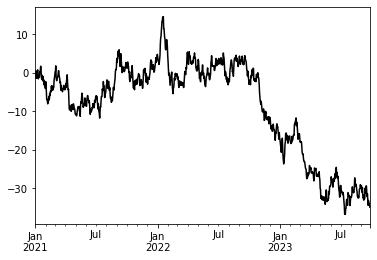

In [239]:
ser.plot(style='k')

In [240]:
df = pd.DataFrame(np.random.randn(1000, 3),
index=pd.date_range('1/1/2021', periods=1000), columns=['A', 'B', 'C'])
df

,A,B,C
2021-01-01,2.032178,1.190330,0.561442
2021-01-02,-0.261505,1.451575,-0.874541
2021-01-03,-0.807820,0.936495,-0.832460
2021-01-04,-0.065055,-0.613692,0.147421
2021-01-05,1.025228,1.012137,0.834736
...,...,...,...
2023-09-23,1.108222,0.067574,-0.192748
2023-09-24,1.425925,1.097807,0.194682
2023-09-25,-0.977634,-1.041365,0.354566
2023-09-26,-0.192358,0.408675,-1.340457


In [241]:
dfc = df.cumsum()
dfc

,A,B,C
2021-01-01,2.032178,1.190330,0.561442
2021-01-02,1.770673,2.641905,-0.313098
2021-01-03,0.962853,3.578400,-1.145558
2021-01-04,0.897798,2.964708,-0.998137
2021-01-05,1.923026,3.976845,-0.163402
...,...,...,...
2023-09-23,-15.058068,22.525942,4.332936
2023-09-24,-13.632142,23.623749,4.527618
2023-09-25,-14.609776,22.582384,4.882184
2023-09-26,-14.802134,22.991059,3.541727


In [242]:
dfc.rolling(window=60).sum()

,A,B,C
2021-01-01,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN
...,...,...,...
2023-09-23,-858.562141,1415.835600,570.980218
2023-09-24,-859.474187,1417.548860,569.771757
2023-09-25,-861.150359,1418.121459,569.472934
2023-09-26,-864.803219,1419.305050,568.789480


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

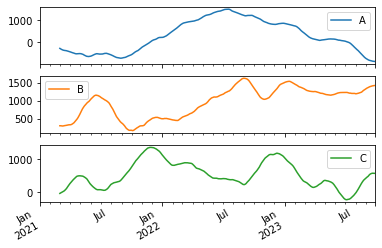

In [243]:
dfc.rolling(window=60).sum().plot(subplots=True)

In [244]:
dft = pd.DataFrame({'val': [0, 1, 2, np.nan, 4]},
index=pd.date_range('20210101 09:00:00', periods=5, freq='s'))
dft

,val
2021-01-01 09:00:00,0.0
2021-01-01 09:00:01,1.0
2021-01-01 09:00:02,2.0
2021-01-01 09:00:03,NaN
2021-01-01 09:00:04,4.0


In [245]:
dft.rolling(2).sum()

,val
2021-01-01 09:00:00,NaN
2021-01-01 09:00:01,1.0
2021-01-01 09:00:02,3.0
2021-01-01 09:00:03,NaN
2021-01-01 09:00:04,NaN


In [246]:
dft.rolling(2, min_periods=1).sum()

,val
2021-01-01 09:00:00,0.0
2021-01-01 09:00:01,1.0
2021-01-01 09:00:02,3.0
2021-01-01 09:00:03,2.0
2021-01-01 09:00:04,4.0


In [247]:
dft.rolling('2s').sum()

,val
2021-01-01 09:00:00,0.0
2021-01-01 09:00:01,1.0
2021-01-01 09:00:02,3.0
2021-01-01 09:00:03,2.0
2021-01-01 09:00:04,4.0


In [251]:
dft1 = pd.DataFrame({'val': [0, 1, 2, np.nan, 4]},
index=pd.Index([pd.Timestamp('20210101 09:00:00'),
pd.Timestamp('20210101 09:00:01'),
pd.Timestamp('20210101 09:00:02'),
pd.Timestamp('20210101 09:00:03'),
pd.Timestamp('20210101 09:00:04')], name='ha'))

In [252]:
dft1

,val
ha,
2021-01-01 09:00:00,0.0
2021-01-01 09:00:01,1.0
2021-01-01 09:00:02,2.0
2021-01-01 09:00:03,NaN
2021-01-01 09:00:04,4.0


In [253]:
dft1.rolling(2).sum()

,val
ha,
2021-01-01 09:00:00,NaN
2021-01-01 09:00:01,1.0
2021-01-01 09:00:02,3.0
2021-01-01 09:00:03,NaN
2021-01-01 09:00:04,NaN


In [254]:
dft1.rolling('2s').sum()

,val
ha,
2021-01-01 09:00:00,0.0
2021-01-01 09:00:01,1.0
2021-01-01 09:00:02,3.0
2021-01-01 09:00:03,2.0
2021-01-01 09:00:04,4.0


In [255]:
dft2 = dft1.reset_index()
dft2

,ha,val
0,2021-01-01 09:00:00,0.0
1,2021-01-01 09:00:01,1.0
2,2021-01-01 09:00:02,2.0
3,2021-01-01 09:00:03,NaN
4,2021-01-01 09:00:04,4.0


In [256]:
dft2.rolling('2s', on='ha').sum()

,ha,val
0,2021-01-01 09:00:00,0.0
1,2021-01-01 09:00:01,1.0
2,2021-01-01 09:00:02,3.0
3,2021-01-01 09:00:03,2.0
4,2021-01-01 09:00:04,4.0


In [257]:
df = pd.DataFrame(np.random.randn(500, 3),
index=pd.date_range('1/1/2021', periods=500), columns=['A', 'B', 'C'])
dfc = df.cumsum()
dfc.head()

,A,B,C
2021-01-01,-1.187102,-0.287880,0.794163
2021-01-02,-2.063438,-0.824848,2.494100
2021-01-03,-1.581582,-1.930917,4.033845
2021-01-04,-4.185843,-1.059045,4.241951
2021-01-05,-2.945722,0.799211,4.037492


In [258]:
df1 = dfc[:20]
df1.head()

,A,B,C
2021-01-01,-1.187102,-0.287880,0.794163
2021-01-02,-2.063438,-0.824848,2.494100
2021-01-03,-1.581582,-1.930917,4.033845
2021-01-04,-4.185843,-1.059045,4.241951
2021-01-05,-2.945722,0.799211,4.037492


In [259]:
df1.rolling(window=5).corr(df1['B'])

,A,B,C
2021-01-01,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN
2021-01-05,-0.150605,1.0,-0.173180
2021-01-06,-0.309582,1.0,0.201689
2021-01-07,-0.304899,1.0,0.225929
2021-01-08,-0.138131,1.0,-0.029965
2021-01-09,-0.959989,1.0,-0.587230
2021-01-10,-0.933130,1.0,0.054669


In [260]:
cvar = (df[['B', 'C']].rolling(window=50).cov(df[['A', 'B']], pairwise=True))
cvar

B         C
2021-01-01 A       NaN       NaN
           B       NaN       NaN
2021-01-02 A       NaN       NaN
           B       NaN       NaN
2021-01-03 A       NaN       NaN
...                ...       ...
2022-05-13 B  1.073771 -0.351217
2022-05-14 A  0.059867 -0.043020
           B  1.030877 -0.361344
2022-05-15 A  0.071285 -0.060087
           B  0.992269 -0.305602

[1000 rows x 2 columns]

In [261]:
cvar.loc['2022-05-13':]

B         C
2022-05-13 A  0.058903 -0.029644
           B  1.073771 -0.351217
2022-05-14 A  0.059867 -0.043020
           B  1.030877 -0.361344
2022-05-15 A  0.071285 -0.060087
           B  0.992269 -0.305602

In [262]:
dfr = df.rolling(window=50).corr()
dfr.loc['2022-05-13':]

A         B         C
2022-05-13 A  1.000000  0.049200 -0.024734
           B  0.049200  1.000000 -0.326735
           C -0.024734 -0.326735  1.000000
2022-05-14 A  1.000000  0.050599 -0.035496
           B  0.050599  1.000000 -0.342187
           C -0.035496 -0.342187  1.000000
2022-05-15 A  1.000000  0.061276 -0.051418
           B  0.061276  1.000000 -0.306597
           C -0.051418 -0.306597  1.000000

In [263]:
dfr.unstack().tail(3)

A                             B                        C  \
              A         B         C         A    B         C         A   
2022-05-13  1.0  0.049200 -0.024734  0.049200  1.0 -0.326735 -0.024734   
2022-05-14  1.0  0.050599 -0.035496  0.050599  1.0 -0.342187 -0.035496   
2022-05-15  1.0  0.061276 -0.051418  0.061276  1.0 -0.306597 -0.051418   

                           
                   B    C  
2022-05-13 -0.326735  1.0  
2022-05-14 -0.342187  1.0  
2022-05-15 -0.306597  1.0

In [264]:
dfr.unstack()[('A', 'C')]



2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04         NaN
2021-01-05         NaN
                ...   
2022-05-11   -0.015247
2022-05-12   -0.028359
2022-05-13   -0.024734
2022-05-14   -0.035496
2022-05-15   -0.051418
Name: (A, C), Length: 500, dtype: float64

In [265]:
dfr.unstack()[('A', 'C')].tail(3)

2022-05-13   -0.024734
2022-05-14   -0.035496
2022-05-15   -0.051418
Name: (A, C), dtype: float64

<AxesSubplot:>

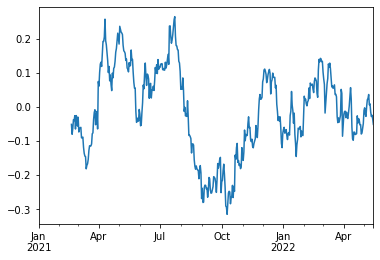

In [267]:
dfr.unstack()[('A', 'C')].plot()

In [268]:
df = pd.DataFrame(np.random.randn(1000, 3),
index=pd.date_range('1/1/2021', periods=1000), columns=['A', 'B', 'C'])
df

,A,B,C
2021-01-01,0.335989,0.754917,-0.449615
2021-01-02,0.304389,-1.457586,-1.060983
2021-01-03,-0.582912,-1.983352,-0.011294
2021-01-04,0.995760,-2.418570,-1.231351
2021-01-05,0.937693,-0.677342,0.484677
...,...,...,...
2023-09-23,-0.446423,-1.847131,1.020495
2023-09-24,-0.829634,0.767205,0.215917
2023-09-25,0.060148,-1.513555,0.333459
2023-09-26,0.415301,-1.146271,0.020136


In [269]:
rol = df.rolling(window=60, min_periods=1)
rol

Rolling [window=60,min_periods=1,center=False,axis=0]

In [270]:
rol.aggregate(np.sum)

,A,B,C
2021-01-01,0.335989,0.754917,-0.449615
2021-01-02,0.640379,-0.702669,-1.510598
2021-01-03,0.057467,-2.686021,-1.521892
2021-01-04,1.053226,-5.104590,-2.753242
2021-01-05,1.990919,-5.781932,-2.268566
...,...,...,...
2023-09-23,8.433061,-4.833643,-1.429756
2023-09-24,6.484539,-1.826522,-1.284260
2023-09-25,6.387734,-1.655517,-0.736414
2023-09-26,6.094186,-4.759656,-2.038964


In [271]:
rol['A'].aggregate(np.sum)

2021-01-01    0.335989
2021-01-02    0.640379
2021-01-03    0.057467
2021-01-04    1.053226
2021-01-05    1.990919
                ...   
2023-09-23    8.433061
2023-09-24    6.484539
2023-09-25    6.387734
2023-09-26    6.094186
2023-09-27    5.838368
Freq: D, Name: A, Length: 1000, dtype: float64

In [272]:
rol[['A', 'C']].agg(np.sum)

,A,C
2021-01-01,0.335989,-0.449615
2021-01-02,0.640379,-1.510598
2021-01-03,0.057467,-1.521892
2021-01-04,1.053226,-2.753242
2021-01-05,1.990919,-2.268566
...,...,...
2023-09-23,8.433061,-1.429756
2023-09-24,6.484539,-1.284260
2023-09-25,6.387734,-0.736414
2023-09-26,6.094186,-2.038964


In [273]:
rol['A'].agg([np.sum, np.mean, np.std])

,sum,mean,std
2021-01-01,0.335989,0.335989,NaN
2021-01-02,0.640379,0.320189,0.022345
2021-01-03,0.057467,0.019156,0.521645
2021-01-04,1.053226,0.263307,0.647957
2021-01-05,1.990919,0.398184,0.637060
...,...,...,...
2023-09-23,8.433061,0.140551,0.975234
2023-09-24,6.484539,0.108076,0.974546
2023-09-25,6.387734,0.106462,0.974544
2023-09-26,6.094186,0.101570,0.972203


In [274]:
rol[['A', 'C']].agg([np.sum, np.mean])

A                   C          
                 sum      mean       sum      mean
2021-01-01  0.335989  0.335989 -0.449615 -0.449615
2021-01-02  0.640379  0.320189 -1.510598 -0.755299
2021-01-03  0.057467  0.019156 -1.521892 -0.507297
2021-01-04  1.053226  0.263307 -2.753242 -0.688311
2021-01-05  1.990919  0.398184 -2.268566 -0.453713
...              ...       ...       ...       ...
2023-09-23  8.433061  0.140551 -1.429756 -0.023829
2023-09-24  6.484539  0.108076 -1.284260 -0.021404
2023-09-25  6.387734  0.106462 -0.736414 -0.012274
2023-09-26  6.094186  0.101570 -2.038964 -0.033983
2023-09-27  5.838368  0.097306 -1.972360 -0.032873

[1000 rows x 4 columns]

In [275]:
rol.agg({'A': np.sum, 'C': lambda x: np.std(x, ddof=1)})

,A,C
2021-01-01,0.335989,NaN
2021-01-02,0.640379,0.432302
2021-01-03,0.057467,0.527216
2021-01-04,1.053226,0.562466
2021-01-05,1.990919,0.715860
...,...,...
2023-09-23,8.433061,1.028893
2023-09-24,6.484539,1.029290
2023-09-25,6.387734,1.029979
2023-09-26,6.094186,1.014983


In [276]:
rol.agg({'A': 'sum', 'C': 'std'})

,A,C
2021-01-01,0.335989,NaN
2021-01-02,0.640379,0.432302
2021-01-03,0.057467,0.527216
2021-01-04,1.053226,0.562466
2021-01-05,1.990919,0.715860
...,...,...
2023-09-23,8.433061,1.028893
2023-09-24,6.484539,1.029290
2023-09-25,6.387734,1.029979
2023-09-26,6.094186,1.014983


In [277]:
rol.agg({'A': ['sum', 'std'], 'C': ['mean', 'std']})

A                   C          
                 sum       std      mean       std
2021-01-01  0.335989       NaN -0.449615       NaN
2021-01-02  0.640379  0.022345 -0.755299  0.432302
2021-01-03  0.057467  0.521645 -0.507297  0.527216
2021-01-04  1.053226  0.647957 -0.688311  0.562466
2021-01-05  1.990919  0.637060 -0.453713  0.715860
...              ...       ...       ...       ...
2023-09-23  8.433061  0.975234 -0.023829  1.028893
2023-09-24  6.484539  0.974546 -0.021404  1.029290
2023-09-25  6.387734  0.974544 -0.012274  1.029979
2023-09-26  6.094186  0.972203 -0.033983  1.014983
2023-09-27  5.838368  0.974755 -0.032873  1.013617

[1000 rows x 4 columns]

In [278]:
df = pd.DataFrame(np.random.randn(100, 3),
                  index=pd.date_range('7/1/2021', periods=100), columns=['A', 'B', 'C'])
df.rolling(window=len(df), min_periods=1).mean()[:5]

,A,B,C
2021-07-01,0.439770,1.266849,-1.699316
2021-07-02,0.483533,1.056073,-2.489706
2021-07-03,-0.074420,1.244754,-2.108735
2021-07-04,0.086983,1.189220,-1.235033
2021-07-05,0.141586,1.248620,-1.066463


In [279]:
df.expanding(min_periods=1)

Expanding [min_periods=1,center=False,axis=0]

In [280]:
df.expanding(min_periods=1).mean()[:5]

,A,B,C
2021-07-01,0.439770,1.266849,-1.699316
2021-07-02,0.483533,1.056073,-2.489706
2021-07-03,-0.074420,1.244754,-2.108735
2021-07-04,0.086983,1.189220,-1.235033
2021-07-05,0.141586,1.248620,-1.066463


In [281]:
ser = pd.Series([1, 2, np.nan, 3, np.nan, 4])
ser.expanding().sum()


0     1.0
1     3.0
2     3.0
3     6.0
4     6.0
5    10.0
dtype: float64

In [282]:
ser.cumsum()


0     1.0
1     3.0
2     NaN
3     6.0
4     NaN
5    10.0
dtype: float64

In [283]:
ser.cumsum().fillna(method='ffill')

0     1.0
1     3.0
2     3.0
3     6.0
4     6.0
5    10.0
dtype: float64

In [284]:
df = pd.DataFrame({'A' : [1, 2, 3, 4, 5, 6, 7]}, index=pd.date_range('7/1/2021', periods=7))
df

,A
2021-07-01,1
2021-07-02,2
2021-07-03,3
2021-07-04,4
2021-07-05,5
2021-07-06,6
2021-07-07,7


In [285]:
df.expanding(min_periods=2).mean()

,A
2021-07-01,NaN
2021-07-02,1.5
2021-07-03,2.0
2021-07-04,2.5
2021-07-05,3.0
2021-07-06,3.5
2021-07-07,4.0


In [286]:
df.rolling(window=2).mean()

,A
2021-07-01,NaN
2021-07-02,1.5
2021-07-03,2.5
2021-07-04,3.5
2021-07-05,4.5
2021-07-06,5.5
2021-07-07,6.5


In [287]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2021', periods=1000))
ser = s.cumsum()
rol = ser.rolling(window=60)

<AxesSubplot:>

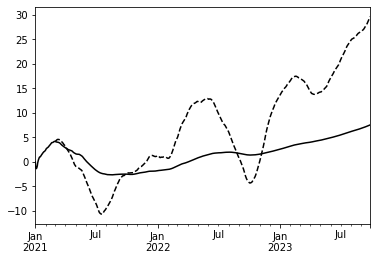

In [289]:
rol.mean().plot(style='k--')
ser.expanding().mean().plot(style='k')

<AxesSubplot:>

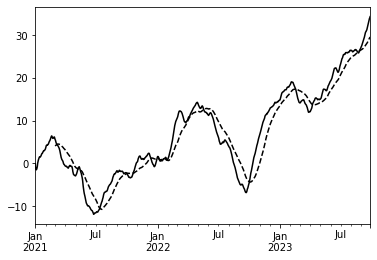

In [290]:
ser.ewm(span=20).mean().plot(style='k')
rol.mean().plot(style='k--')